In [454]:
# Installing required packages
import pip
%pip install scikit-image
%pip install sklearn
%pip install scikit-learn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.


In [455]:
import numpy as np
import json
import os
import pdb
from matplotlib import pyplot as plt
import random
from scipy.ndimage import binary_dilation, binary_erosion, binary_hit_or_miss
import skimage


In [456]:
# Importing custom modules
from ListSelEm import *
from Utils import Process, Change_Colour

Data Visualization

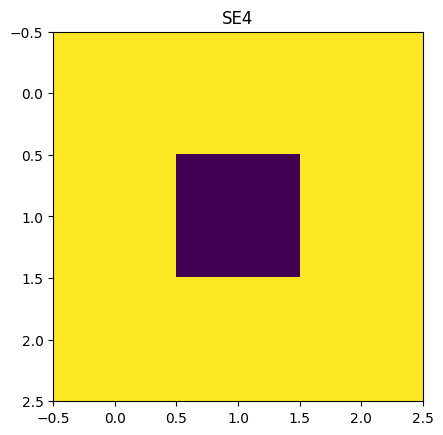

In [457]:
from matplotlib.colors import LinearSegmentedColormap
magenta_cmap = LinearSegmentedColormap.from_list('greyblack_cmap', ['black', 'grey'])

# Display the image using the magenta colormap
plt.imshow(list_se_3x3[3])
plt.title("SE4")  # Add the label as the title
plt.show()

(15, 15)


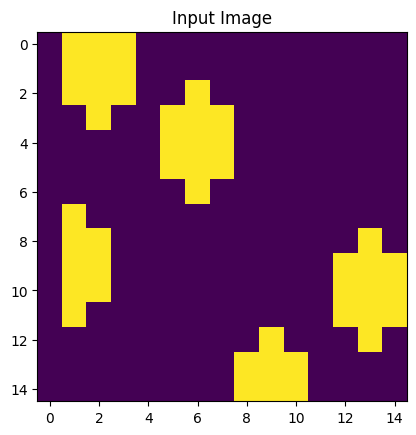

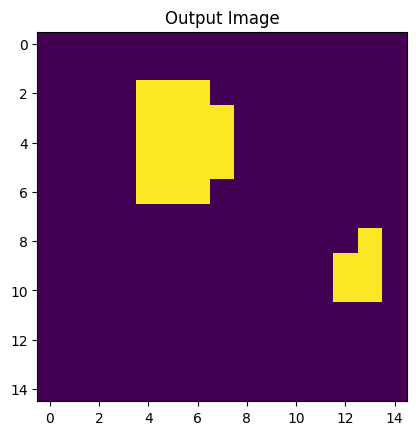

In [458]:
# Load the dataset for Task010 (Random Task for visualisation)
with open('Dataset/CatA_Simple/Task010.json', 'r') as file:
    data = json.load(file)

# Convert input and output data to NumPy arrays
input_image = np.array(data[0]['input'])
output_image = np.array(data[0]['output'])

# Display the shape of the input image
print(input_image.shape)

# Visualize the input image
plt.imshow(input_image)
plt.title("Input Image")
plt.show()

# Visualize the output image
plt.imshow(output_image)
plt.title("Output Image")
plt.show()

Class Labels

In [459]:
def create_classification_dataset(operation, struct_elem, task_id):
    # Initialize the default class label
    current_label = 1  # Start from 1 to represent the first class label

    # Construct the file path for the solution file
    solution_file_path = f'Dataset/CatA_Simple/Task{task_id}_soln.txt'
    
    # Read the file and determine the class label
    with open(solution_file_path, 'r') as file:
        for line in file:
            # Check if both the operation and structuring element are found in the current line
            if operation in line and struct_elem in line:
                if operation == "Erosion":
                    return current_label - 4 #Since erosion starts from step 5 onwards 
                else:
                    return current_label
            current_label += 1  # Increment the class label for the next line

    # If no match is found, return 0 as the default class label
    return 0            


In [460]:
y_labels = []

for task_index in range(100):
    # Generate the class label for the specified operation and structuring element
    class_label = create_classification_dataset("Erosion", "SE4", f'{task_index:03d}')
    # Append the class label 4 times for each task
    y_labels.extend([class_label] * 4)

# Convert the labels list to a NumPy array
y_labels = np.array(y_labels)

# Display the generated labels and their shape
print(y_labels)


[2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0
 0 3 3 3 3 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 4 4 4 4 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 3 3 3 3 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 4 4 4 4 3 3 3 3 0 0 0 0 4 4 4 4 0 0 0 0
 0 0 0 0 0 0 0 0 4 4 4 4 3 3 3 3 0 0 0 0 3 3 3 3 0 0 0 0 3 3 3 3 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 0 0 0 0 1 1 1 1 0 0 0 0 3 3 3 3 1 1 1 1 0 0 0 0 3 3 3 3]


Class Distribution

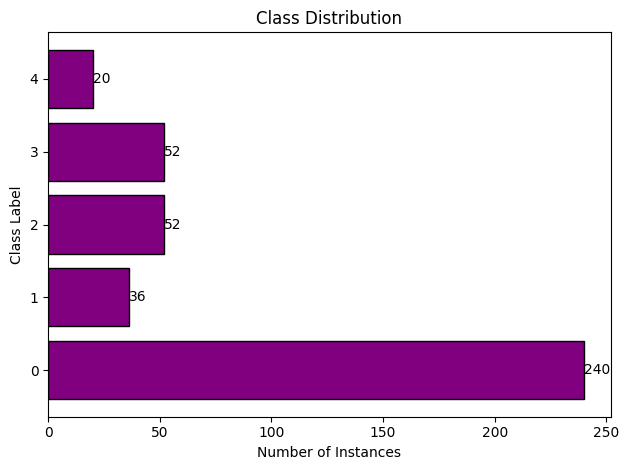

In [461]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each class label
class_counts = Counter(y_labels)

# Sort class labels for a clean display
sorted_labels = sorted(class_counts.keys())
sorted_counts = [class_counts[label] for label in sorted_labels]

# Create a horizontal bar plot for class distribution
plt.barh(sorted_labels, sorted_counts, color='purple', edgecolor='black')

# Annotate each bar with its count
for i, count in enumerate(sorted_counts):
    plt.text(count, i, str(count), va='center', ha='left')

# Add labels to the axes
plt.xlabel('Number of Instances')
plt.ylabel('Class Label')
plt.title('Class Distribution')

# Adjust layout for readability
plt.tight_layout()

# Display the plot
plt.show()

In [462]:
def generate_feature_matrix(task_id, struct_elem_num, y_labels):

    # Load task data from the corresponding JSON file
    task_file_path = f'Dataset/CatA_Simple/Task{task_id}.json'
    with open(task_file_path, 'r') as file:
        task_data = json.load(file)

    # Initialize the feature matrix for 4 samples, each with 459 features
    num_samples = 4
    num_features = 459
    features = np.zeros((num_samples, num_features))

    # Retrieve the corresponding structuring element features
    struct_elem_features = np.array(list_se_3x3[struct_elem_num - 1]).flatten()

    # Process each sample and compute features
    for sample_index in range(num_samples):
        input_image = np.array(task_data[sample_index]['input'])
        output_image = np.array(task_data[sample_index]['output'])

        # Fill pixel features: alternate between input and output pixel values
        pixel_features = np.empty((input_image.size * 2,), dtype=input_image.dtype)
        pixel_features[0::2] = input_image.flatten()
        pixel_features[1::2] = output_image.flatten()
        features[sample_index, :pixel_features.size] = pixel_features

        # Append structuring element features based on label
        label_index = int(task_id) * num_samples + sample_index
        if y_labels[label_index] != 0:
            features[sample_index, -9:] = struct_elem_features

    return features

In [463]:
# Generate the 'x' features for the dataset
x_features = np.array([])

for task_id in range(100):
    # Generate features for the current task and append them to the feature matrix
    current_features = generate_feature_matrix(f'{task_id:03d}', 6, y_labels=y_labels)
    
    if task_id == 0:
        # Initialize the features array with the first task's features
        x_features = current_features
    else:
        # Append the current task's features to the existing features array
        x_features = np.append(x_features, current_features, axis=0)

# Print the shape and contents of the feature matrix
print(x_features.shape)
print(x_features)

(400, 459)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [464]:
# Compute the mean of each feature (column-wise)
feature_means = np.mean(x_features, axis=0)

# Print the shape of the means
print(f"Shape of Feature Means: {feature_means.shape}")

# Mean center the data by subtracting the mean of each feature from all rows
x_features -= feature_means  # Broadcasting for efficient computation

# Print the mean-centered data
print("Mean-Centered Data:")
print(x_features)

Shape of Feature Means: (459,)
Mean-Centered Data:
[[-0.07   0.    -0.085 ...  0.6    0.     0.   ]
 [-0.07   0.    -0.085 ...  0.6    0.     0.   ]
 [-0.07   0.    -0.085 ...  0.6    0.     0.   ]
 ...
 [-0.07   0.    -0.085 ...  0.6    0.     0.   ]
 [-0.07   0.    -0.085 ...  0.6    0.     0.   ]
 [-0.07   0.    -0.085 ...  0.6    0.     0.   ]]


PCA

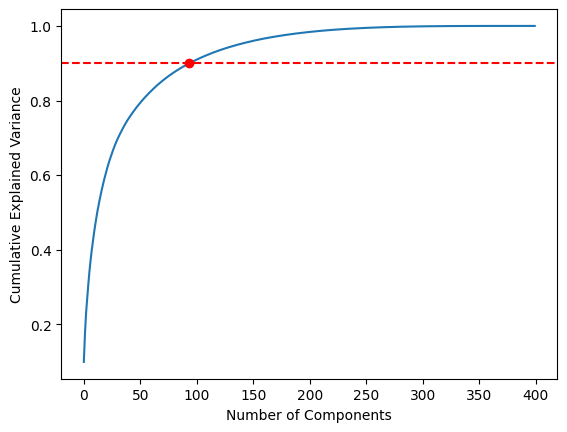

93.4430918922189


In [465]:
import sklearn
from sklearn.decomposition import PCA

# Fit PCA on the feature matrix
pca = PCA().fit(x_features)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Add a horizontal line at 90% variance
plt.axhline(y=0.9 , color='r', linestyle='--')

# Define the threshold for cumulative explained variance
threshold = 0.9

# Find the number of components corresponding to the threshold
x_intercept = np.interp(threshold, np.cumsum(pca.explained_variance_ratio_), range(len(pca.explained_variance_ratio_)))

# Plot the intercept point on the graph
plt.plot(x_intercept, threshold, 'ro')

# Add labels to the plot
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Show the plot
plt.show()

# Print the number of components that explains 90% of the variance
print(x_intercept)

In [466]:
from sklearn.decomposition import PCA

# Define the number of components for PCA (94 components)
pca = PCA(n_components=94)

# Fit PCA to the feature matrix and transform the data
x_pca = pca.fit_transform(x_features)

# Print the transformed feature matrix
print(x_pca)

[[ 1.57030301 -0.1763443   2.32508923 ...  0.62744731 -0.09352867
   0.30331731]
 [-1.13856662 -4.56384981 -0.94906398 ...  0.18340809 -0.14396385
  -0.16794071]
 [ 2.84026397  1.73654829 -2.270197   ... -0.55599427  0.45499109
   0.19502287]
 ...
 [ 2.81092552  0.31399455 -2.13809098 ...  0.12618879  0.30074057
  -0.4265891 ]
 [ 0.21117333 -1.2544371   1.12388593 ...  0.19495394 -0.15514329
   0.21654957]
 [-1.76823116 -0.44590234  1.01456725 ... -0.20502423  0.03434301
  -0.05745434]]


In [467]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_labels, 
                                                    test_size=0.1, random_state=60, 
                                                    shuffle=True, stratify=y_labels)

# Print the shape and contents of the training feature set
print(X_train.shape)
print(X_train)

# Print the shape and contents of the training labels
print(y_train.shape)
print(y_train)
  

(360, 94)
[[-7.08259191e-01 -2.12931519e+00 -1.51527216e+00 ...  1.16042638e-01
   2.83076259e-01 -6.41099175e-02]
 [ 4.49651178e+00  2.03745359e-01  1.97301742e+00 ...  1.49342750e-01
   4.23922764e-01  1.25261075e-01]
 [ 1.88605262e+00 -8.89379333e-01  2.32178694e+00 ...  1.85117801e-01
   2.55357135e-01 -4.90929698e-01]
 ...
 [ 3.76116446e+00  1.29784929e+00 -8.62943015e-01 ... -2.03863728e-01
   4.07557964e-01 -1.87759872e-02]
 [-5.22364360e-01  4.16632919e+00  2.46409401e+00 ... -2.80521152e-04
  -2.12018819e-01  1.56712425e-01]
 [-2.82554387e+00  1.45195894e+00  1.93753024e-01 ... -2.30263593e-01
   3.08126233e-01  4.90268417e-01]]
(360,)
[2 0 3 2 0 0 2 3 0 0 0 3 0 0 2 0 2 0 0 3 0 4 0 2 0 1 0 0 0 3 0 2 0 3 0 0 2
 0 3 0 3 2 1 2 0 2 4 0 1 4 0 0 3 0 0 0 1 3 0 2 0 0 0 1 3 0 2 1 0 3 0 0 0 0
 0 0 0 3 0 2 0 0 0 3 3 0 2 0 2 1 0 0 0 0 2 3 0 0 4 0 0 0 1 4 0 3 0 0 3 2 0
 0 3 0 1 4 2 0 0 0 1 1 0 1 0 0 0 0 2 0 0 4 0 0 0 1 3 3 0 1 0 0 3 0 2 0 0 1
 0 3 2 0 3 0 0 2 0 0 2 0 3 0 3 3 0 0 2 0 0 0 0 

Logistic Regression

[0.33333333 2.22222222 1.53846154 1.53846154 4.        ]
0.6972222222222222
Train accuracy = 0.9527777777777777
Test accuracy = 0.65
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.20      0.25      0.22         4
           2       0.00      0.00      0.00         5
           3       0.25      0.20      0.22         5
           4       0.00      0.00      0.00         2

    accuracy                           0.65        40
   macro avg       0.29      0.29      0.29        40
weighted avg       0.65      0.65      0.65        40



c:\Users\Aryan Nambiar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


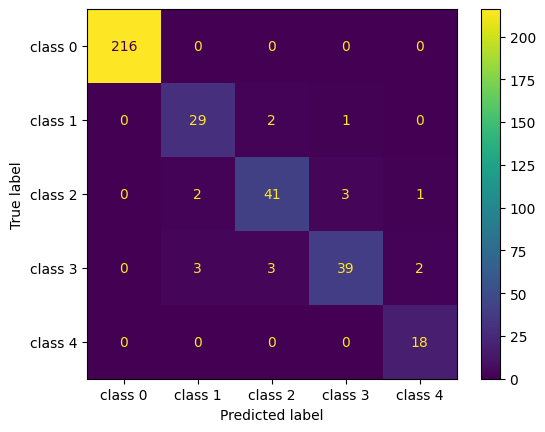

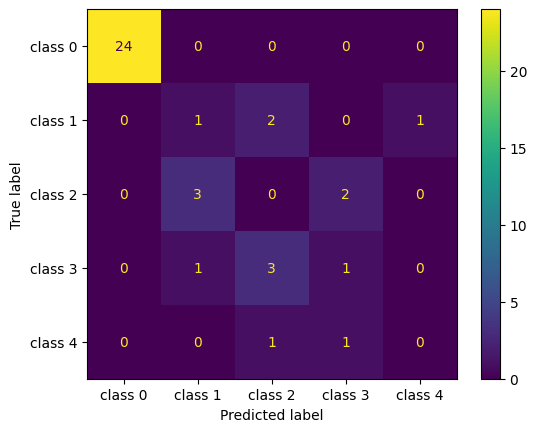

In [468]:
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Define class labels
classes = np.array([0, 1, 2, 3, 4])

# Compute class weights to handle imbalanced classes
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_labels)
print(class_weights)

# Create a dictionary for class weights
class_weight_dict = {i: class_weights[i] for i in range(5)}

# Generate a list of regularization parameters (C values)
C_values = []
current_C_value = 0.005
while current_C_value <= 0.1:
    C_values.append(current_C_value)
    current_C_value += 0.005

# List to store accuracy scores for each C value
acc_list = []

# Perform cross-validation for each C value
for C in C_values:
    cv = StratifiedKFold(n_splits=7)
    model = LogisticRegression(class_weight=class_weight_dict, penalty='l2', C=C, multi_class='multinomial')
    scores = cross_val_score(model, X_train, y_train, n_jobs=-1, scoring='accuracy')
    acc_list.append(scores.mean())

# Print the maximum accuracy obtained
print(max(acc_list))

# Find the C value corresponding to the best accuracy
best_C_index = acc_list.index(max(acc_list))

# Train the logistic regression model using the best C value
model = LogisticRegression(class_weight=class_weight_dict, penalty='l2', C=C_values[best_C_index], multi_class='multinomial')
model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Print accuracy scores
print(f'Train accuracy = {accuracy_score(y_true=y_train, y_pred=y_train_pred)}')
print(f'Test accuracy = {accuracy_score(y_true=y_test, y_pred=y_pred)}')

# Print classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

# Confusion matrix for training data
cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
cm_train_display.plot()
plt.show()

# Confusion matrix for test data
cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
cm_test_display.plot()
plt.show()

Decision Tree

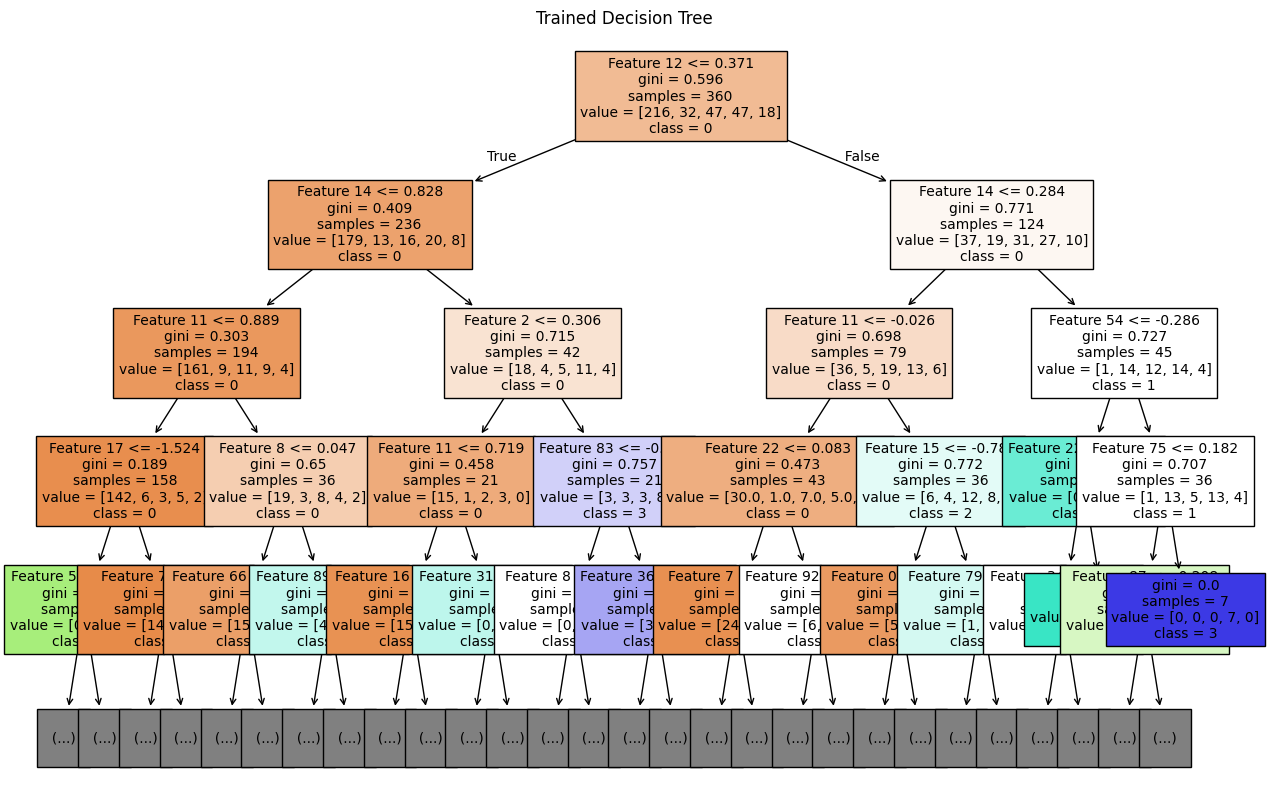

Training Accuracy: 1.00
Test Accuracy: 0.40


In [469]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import matplotlib.pyplot as plt

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on both training and test sets
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Visualize the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    decision_tree,
    feature_names=[f"Feature {i}" for i in range(X_train.shape[1])],  # Generate feature names dynamically
    class_names=[str(cls) for cls in sorted(set(y_train))],  # Dynamically generate class names
    filled=True,
    fontsize=10,
    max_depth=4,  # Limit depth for better visualization
)
plt.title("Trained Decision Tree")
plt.show()

# Evaluate and print accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")



In [470]:
print(decision_tree.tree_.max_depth)

11


In [471]:
def display_confusion_matrix(y_pred, y_true, domain):
    print(f'{domain} Confusion Matrix')
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
    cm_display.plot()
    plt.show()
    

Training Accuracy: 1.0
Test Accuracy: 0.4
Training Confusion Matrix


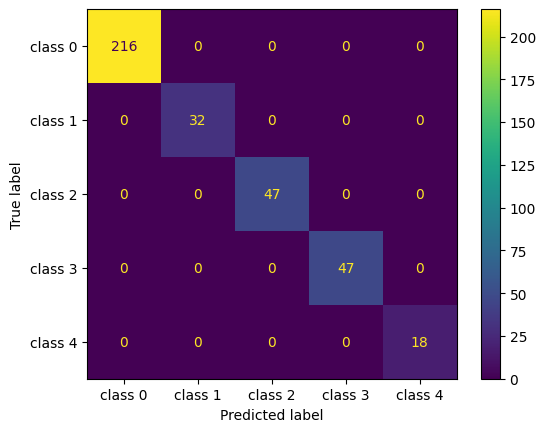

Testing Confusion Matrix


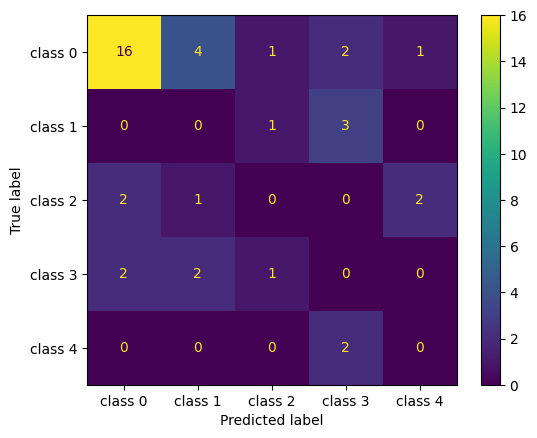

In [472]:
print(f'Training Accuracy: {accuracy_score(train_predictions, y_train)}')
print(f'Test Accuracy: {accuracy_score(test_predictions, y_test)}')

display_confusion_matrix(train_predictions, y_train, domain='Training')
display_confusion_matrix(test_predictions, y_test, domain='Testing')

# The model exhibits overfitting!

Training Accuracy: 0.9111111111111111
Test Accuracy: 0.45
Training Confusion Matrix


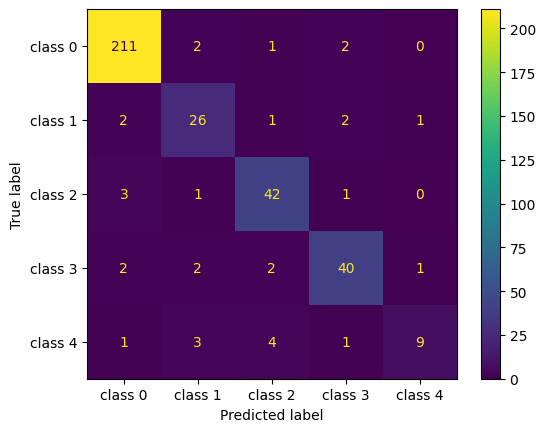

Testing Confusion Matrix


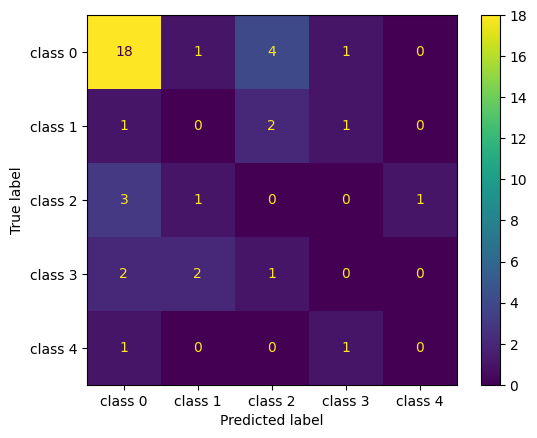

In [473]:
# Implementing Pre-Pruning Techniques
param_grid = {'max_depth': [10, 12, 14, 16, 18, 20, 22],
              'min_samples_split': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3]}

clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print(f'Training Accuracy: {accuracy_score(y_train_pred, y_train)}')
print(f'Test Accuracy: {accuracy_score(y_test_pred, y_test)}')

display_confusion_matrix(y_train_pred, y_train, domain='Training')
display_confusion_matrix(y_test_pred, y_test, domain='Testing')


In [474]:
# Post-Pruning the Best Decision Tree using Cost Complexity
path = best_model.cost_complexity_pruning_path(X_train, y_train) 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(f'CCP Alphas: {ccp_alphas}')
print(f'CCP Alphas Shape: {ccp_alphas.shape}')

CCP Alphas: [0.         0.00185185 0.00198413 0.00216049 0.00273632 0.00595238
 0.00610022 0.00625    0.00648148 0.00708333 0.00714286 0.00716501
 0.00722222 0.00735294 0.0077381  0.00789777 0.00823413 0.00828189
 0.00856481 0.00886243 0.00887513 0.00902778 0.0091358  0.00934575
 0.00935746 0.00997121 0.01003086 0.01017663 0.01113709 0.01119658
 0.01180276 0.01197531 0.01235419 0.01256614 0.01391529 0.01546985
 0.01947379 0.02103645 0.02163297 0.06195647]
CCP Alphas Shape: (40,)


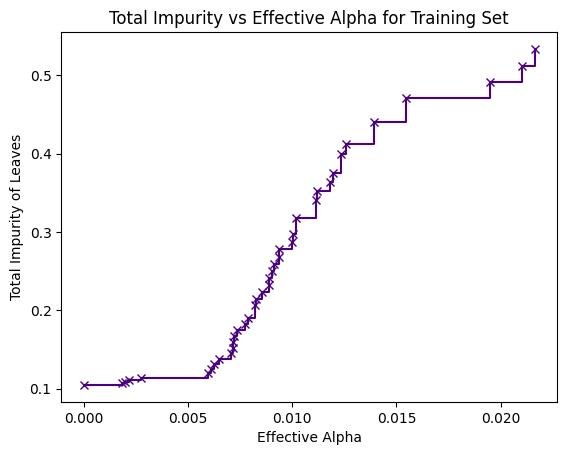

In [475]:
# Plotting the Total Impurity vs Effective Alpha for the Training Set
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="x", drawstyle="steps-post" , color='indigo')

# Setting labels and title for the plot
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")

plt.show()

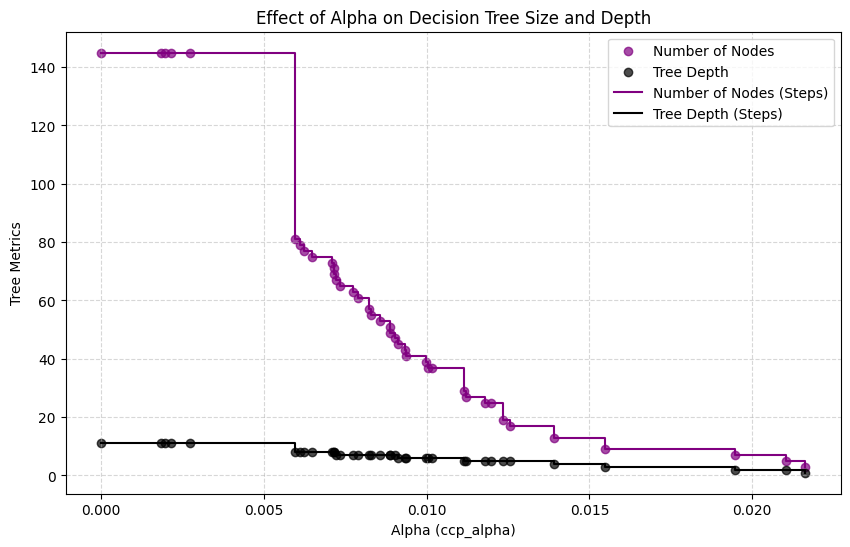

In [476]:
# Train decision tree models for each alpha value
pruned_trees = []
for alpha in ccp_alphas:
    pruned_tree = tree.DecisionTreeClassifier(random_state=60, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)

# Remove the last tree and alpha corresponding to a trivial tree with one node
pruned_trees = pruned_trees[:-1]
pruning_alphas = ccp_alphas[:-1]

# Extract the node counts and depths for each pruned tree
node_counts = [tree_model.tree_.node_count for tree_model in pruned_trees]
tree_depths = [tree_model.tree_.max_depth for tree_model in pruned_trees]

# Plotting alpha values against node count and depth
plt.figure(figsize=(10, 6))
plt.scatter(pruning_alphas, node_counts, label='Number of Nodes', color='purple', alpha=0.7)
plt.scatter(pruning_alphas, tree_depths, label='Tree Depth', color='black', alpha=0.7)
plt.plot(pruning_alphas, node_counts, label='Number of Nodes (Steps)', drawstyle="steps-post", color='purple')
plt.plot(pruning_alphas, tree_depths, label='Tree Depth (Steps)', drawstyle="steps-post", color='black')

# Add labels, legend, and title
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Tree Metrics")
plt.title("Effect of Alpha on Decision Tree Size and Depth")
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

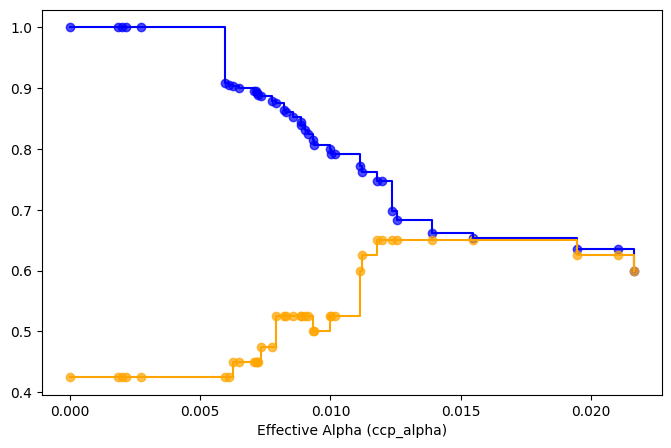

In [477]:
# Calculate training and testing accuracy for each pruned tree
training_accuracies = []
testing_accuracies = []

for model in pruned_trees:
    # Calculate and store accuracies
    training_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    testing_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plot accuracy vs alpha values
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(pruning_alphas, training_accuracies, label="Training Accuracy", drawstyle="steps-post", color="blue")
plt.plot(pruning_alphas, testing_accuracies, label="Testing Accuracy", drawstyle="steps-post", color="orange")
plt.scatter(pruning_alphas, training_accuracies, color="blue", alpha=0.7)
plt.scatter(pruning_alphas, testing_accuracies, color="orange", alpha=0.7)

# Add plot labels, title, and legend
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel

Training Accuracy: 0.7333333333333333
Test Accuracy: 0.65
Train Confusion Matrix


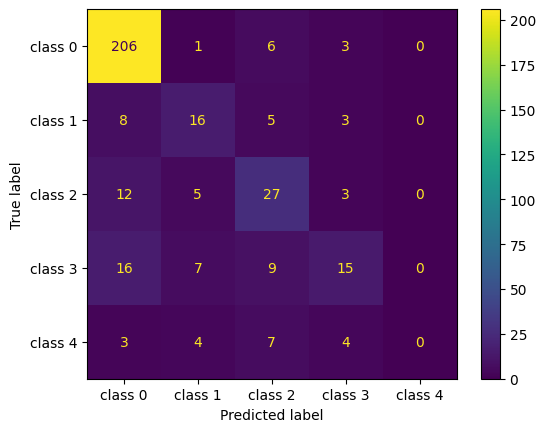

Test Confusion Matrix


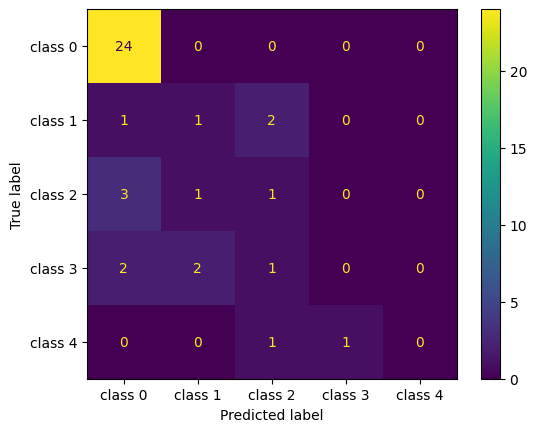

In [478]:
# Train the best decision tree model using the optimal ccp_alpha value
clf_best = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.012)
clf_best.fit(X_train, y_train)

# Predict the labels for both training and test datasets
y_train_pred = clf_best.predict(X_train)
y_test_pred = clf_best.predict(X_test)

# Print the accuracy scores for both training and test sets
print(f'Training Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_true=y_test, y_pred=y_test_pred)}')

# Visualize the confusion matrix for training and test sets
display_confusion_matrix(y_train_pred, y_train, domain='Train')
display_confusion_matrix(y_test_pred, y_test, domain='Test')

Bagging and Boosting

In [479]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to address class imbalance
class_labels = np.unique(y_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_labels)

# Create a dictionary for class weights
class_weight_dict = dict(zip(class_labels, class_weights))
print(f'Class Weights: {class_weight_dict}')

# Define a simplified hyperparameter search grid
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Initialize the RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

# Perform RandomizedSearchCV with a reduced number of iterations
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100,  # Reduced to 100 iterations for efficiency
    cv=3,
    verbose=1,  # Reduced verbosity
    random_state=42,
    n_jobs=-1
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

Class Weights: {0: 0.3333333333333333, 1: 2.2222222222222223, 2: 1.5384615384615385, 3: 1.5384615384615385, 4: 4.0}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 0.3333333333333333,
                                                                  1: 2.2222222222222223,
                                                                  2: 1.5384615384615385,
                                                                  3: 1.5384615384615385,
                                                                  4: 4.0},
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000]},
                   random_state=42, verbose=1)

In [480]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

def evaluate(model, test_features, test_labels):
    # Predict the labels using the trained model
    predictions = model.predict(test_features)
    
    # Calculate the accuracy, precision, and recall
    accuracy = accuracy_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions, average='macro')
    precision = precision_score(test_labels, predictions, average='macro')
    
    # Print evaluation metrics
    print(f'Accuracy = {accuracy*100:.2f}%.')
    print(f'Precision = {precision*100:.2f}%.')
    print(f'Recall = {recall*100:.2f}%.')

c:\Users\Aryan Nambiar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy = 62.50%.
Precision = 22.63%.
Recall = 25.00%.
Train Confusion Matrix


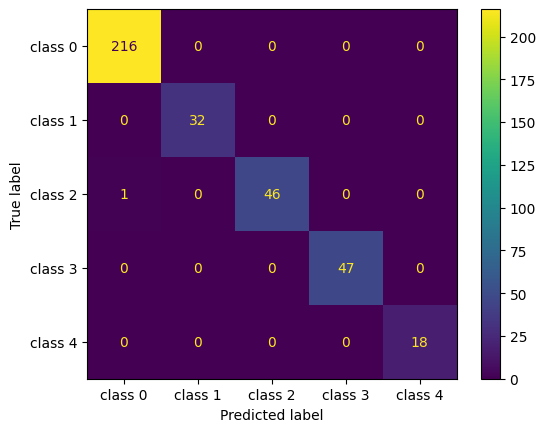

Test Confusion Matrix


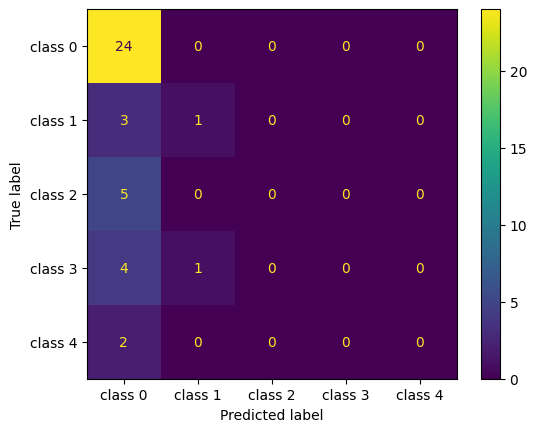

In [481]:
# Initialize the base model with 15 estimators and random_state set for reproducibility
base_model = RandomForestClassifier(n_estimators=15, random_state=42)

# Fit the model to the training data
base_model.fit(X_train, y_train)

# Evaluate the model on the test set
evaluate(base_model, X_test, y_test)

# Predict on both the training and test sets
y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

# Plot confusion matrices for both training and test predictions
display_confusion_matrix(y_train_pred, y_train, domain='Train')
display_confusion_matrix(y_test_pred, y_test, domain='Test')

c:\Users\Aryan Nambiar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy = 62.50%.
Precision = 19.64%.
Recall = 24.00%.
Train Confusion Matrix


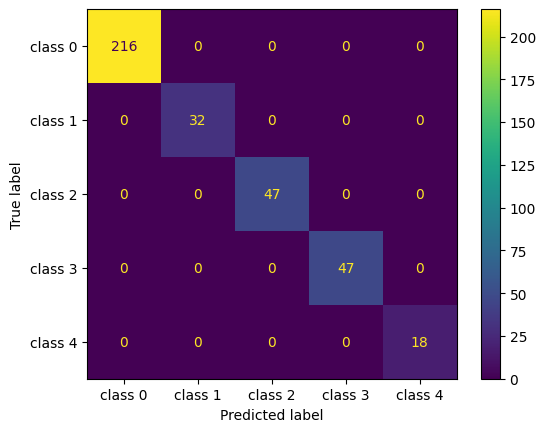

Test Confusion Matrix


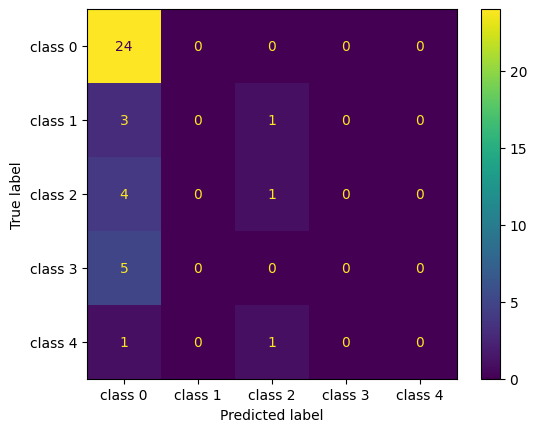

In [482]:
# Extract the best estimator from the random search and evaluate on the test set
best_random = random_search.best_estimator_
evaluate(best_random, X_test, y_test)

# Make predictions on both the training and test sets
y_train_pred = best_random.predict(X_train)
y_test_pred = best_random.predict(X_test)

# Plot confusion matrices for both training and test predictions
display_confusion_matrix(y_train_pred, y_train, domain='Train')
display_confusion_matrix(y_test_pred, y_test, domain='Test')

In [483]:
#Using the Extra Tree Classifier
print(random_search.best_params_)
best_random_forest = random_search.best_estimator_

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


Extra Tree

Class Weights: {0: 0.3333333333333333, 1: 2.2222222222222223, 2: 1.5384615384615385, 3: 1.5384615384615385, 4: 4.0}
Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\Aryan Nambiar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy = 60.00%.
Precision = 12.97%.
Recall = 20.00%.
Training Confusion Matrix


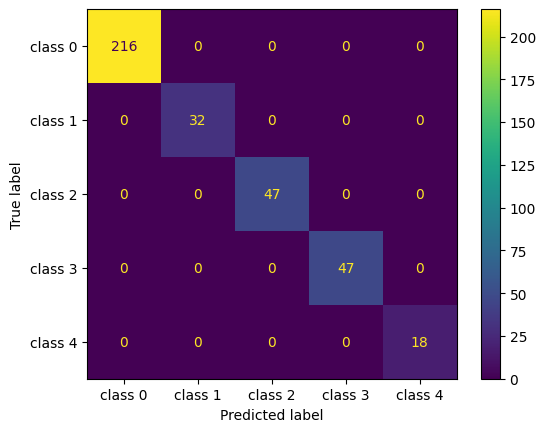

Test Confusion Matrix


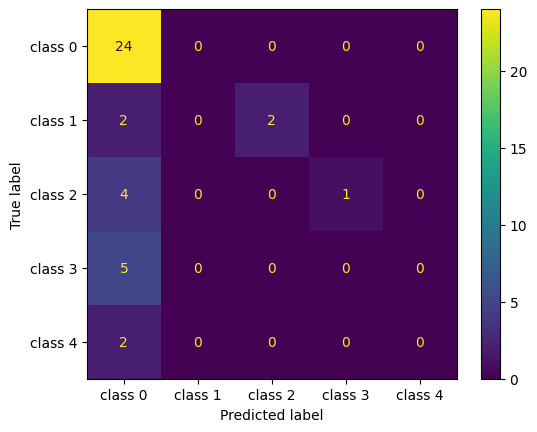

In [484]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weight_dict = dict(zip(np.unique(y_labels), class_weights))
print(f"Class Weights: {class_weight_dict}")

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth': [10, 12, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 4],
    'n_estimators': [50, 100, 150]
}

# Initialize the ExtraTreesClassifier with class weights
extra_trees = ExtraTreesClassifier(n_jobs=-1, class_weight=class_weight_dict, random_state=42)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=extra_trees, 
    param_grid=param_grid, 
    cv=3, 
    verbose=1,  # Reduced verbosity for cleaner output
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Evaluate the best model
evaluate(best_model, X_test, y_test)  # Updated to use evaluate_model from earlier modification

# Make predictions on train and test data
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Display confusion matrices
display_confusion_matrix(train_preds, y_train, domain='Training')
display_confusion_matrix(test_preds, y_test, domain='Test')


Best Parameters from Grid Search: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}

Top Features by Importance:
1. Feature 12 (Importance: 0.026979)
2. Feature 14 (Importance: 0.018564)
3. Feature 87 (Importance: 0.018509)
4. Feature 15 (Importance: 0.015935)
5. Feature 17 (Importance: 0.015878)
6. Feature 11 (Importance: 0.015852)
7. Feature 22 (Importance: 0.015439)
8. Feature 13 (Importance: 0.015321)
9. Feature 92 (Importance: 0.015183)
10. Feature 47 (Importance: 0.014707)
11. Feature 5 (Importance: 0.014552)
12. Feature 69 (Importance: 0.013191)
13. Feature 78 (Importance: 0.012887)
14. Feature 28 (Importance: 0.012453)
15. Feature 46 (Importance: 0.012338)
16. Feature 36 (Importance: 0.012257)
17. Feature 20 (Importance: 0.011916)
18. Feature 91 (Importance: 0.011900)
19. Feature 83 (Importance: 0.011846)
20. Feature 0 (Importance: 0.011751)
21. Feature 49 (Importance: 0.011738)
22. Feature 10 (Impo

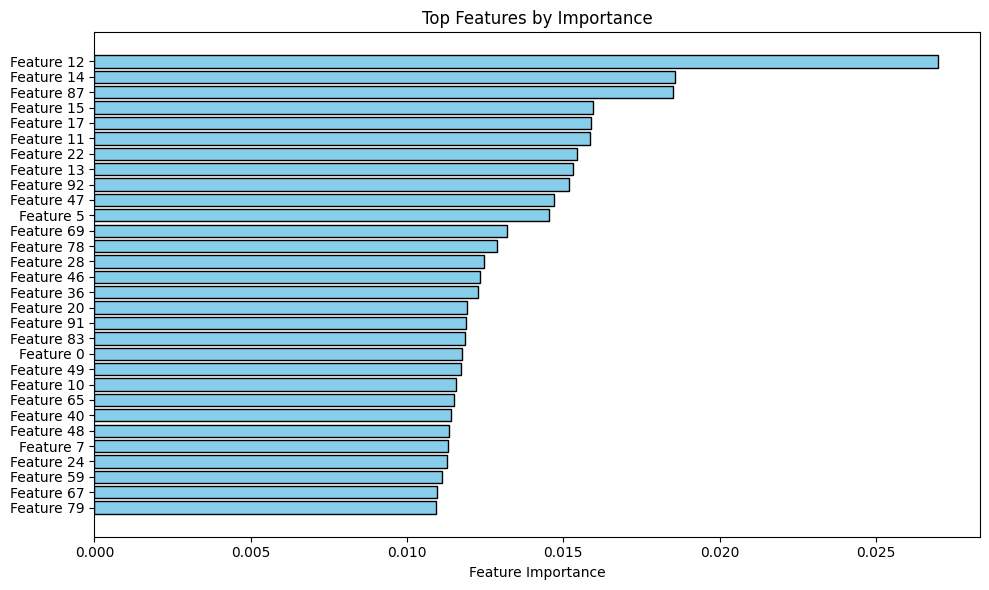

In [485]:
# Display the best parameters from Grid Search
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Define the number of top features to display
TOP_FEATURES = 30

# Extract feature importances
feature_importances = best_model.feature_importances_

# Sort the features based on importance and select the top features
top_indices = np.argsort(feature_importances)[::-1][:TOP_FEATURES]

# Display the top features with their importance
print("\nTop Features by Importance:")
for rank, idx in enumerate(top_indices, start=1):
    print(f"{rank}. Feature {idx} (Importance: {feature_importances[idx]:.6f})")

# Optional: Visualization of top features
plt.figure(figsize=(10, 6))
plt.barh(range(TOP_FEATURES), feature_importances[top_indices][::-1], align='center', color='skyblue', edgecolor='black')
plt.yticks(range(TOP_FEATURES), [f"Feature {i}" for i in top_indices[::-1]])
plt.xlabel("Feature Importance")
plt.title("Top Features by Importance")
plt.tight_layout()
plt.show()

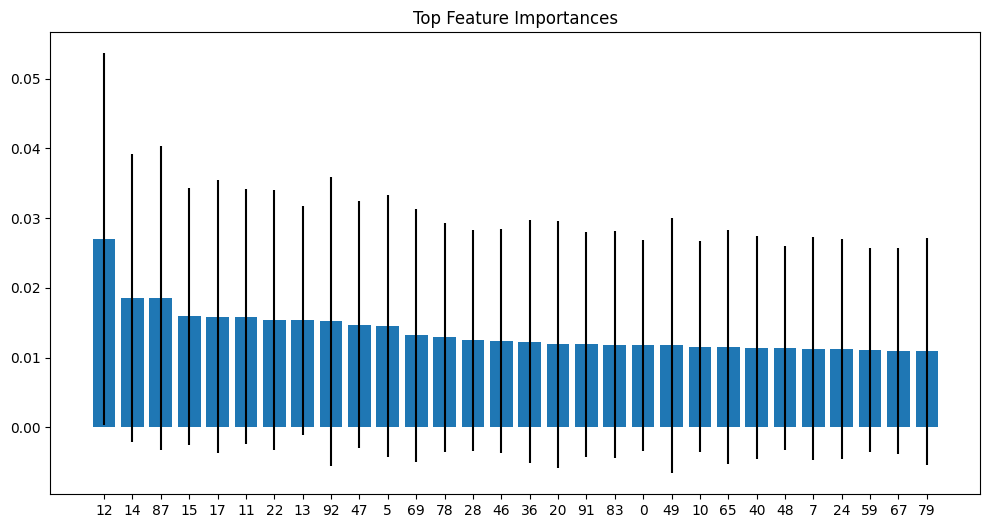

In [486]:
# Plotting the top feature importances with error bars
plt.figure(figsize=(12,6))
plt.title('Top Feature Importances')

std = np.std(
    [tree.feature_importances_ for tree in best_model.estimators_],
    axis = 0
)

plt.bar(
    range(TOP_FEATURES), 
    feature_importances[top_indices],
    yerr=std[top_indices],  # Adding error bars for feature importances
)
plt.xticks(range(TOP_FEATURES), top_indices)  # Set x-axis ticks to feature indices
plt.show()  # Display the plot

XGBOOST

In [487]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize GradientBoostingClassifier with chosen parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,  # Reduced learning rate for better convergence
    min_samples_split=3,  # Slightly lower split threshold
    min_samples_leaf=2,
    max_depth=3,  # Increased depth for capturing more complexity
    max_features='sqrt',
    subsample=0.8, 
    random_state=42
)

# Define the parameter grid for tuning n_estimators
param_grid_1 = {'n_estimators': range(50, 301, 25)}  # Start from 50, increment by 25 for efficiency

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=gb_model, 
    param_grid=param_grid_1, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=7,  # Increased cross-validation folds for better model evaluation
    verbose=1  # Added verbosity to track progress 
)
grid_search.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 7 folds for each of 11 candidates, totalling 77 fits
Best Parameters: {'n_estimators': 250}
Best Accuracy Score: 0.6499676793794441


In [488]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning max_depth and min_samples_split
param_grid_2 = {
    'max_depth': range(2, 6),  # Adjusted range for more meaningful depth values
    'min_samples_split': [4, 6, 8]  # Explicitly listed values for clarity
}

# Initialize GradientBoostingClassifier with fixed parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,  # Adjusted for a more gradual learning process
    n_estimators=250,  # Slightly reduced to balance training time and performance
    max_features='sqrt', 
    subsample=0.8, 
    random_state=45
)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_2,
    scoring='accuracy',
    n_jobs=-1,
    cv=7,  # Increased cross-validation folds for better evaluation
    verbose=1  # Added verbosity to track progress
)

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Output the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
Best Parameters: {'max_depth': 2, 'min_samples_split': 8}
Best Accuracy Score: 0.6667744020685197


In [489]:
# Define the parameter grid for min_samples_leaf and min_samples_split
param_test_3 = {
    'min_samples_leaf': range(4, 20, 2),
    'min_samples_split': range(4, 8, 2)
}

# Perform GridSearchCV to find the best values for min_samples_leaf and min_samples_split
param_grid_3 = GridSearchCV(
    estimator=GradientBoostingClassifier(
        learning_rate=0.15, 
        n_estimators=250, 
        max_features='sqrt', 
        max_depth=2, 
        subsample=0.8, 
        random_state=42
    ),
    param_grid=param_test_3, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=7
)

param_grid_3.fit(X_train, y_train)

# Output the best parameters and score
print(param_grid_3.best_params_)
print(param_grid_3.best_score_)

{'min_samples_leaf': 14, 'min_samples_split': 4}
0.691553544494721


In [490]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import numpy as np

def evaluate_boosted_model(model, X_train, y_train, perform_cv=True, cv_folds=7):
    """
    Evaluate a boosted model on training data with optional cross-validation.

    Parameters:
    - model: The model to evaluate (e.g., GradientBoostingClassifier).
    - X_train: Training data features.
    - y_train: Training data target labels.
    - perform_cv: Whether to perform cross-validation (default: True).
    - cv_folds: Number of cross-validation folds (default: 7).

    Outputs:
    - Prints accuracy score and mean cross-validation score.
    - Displays the confusion matrix for training predictions.
    """
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the training data
    train_predictions = model.predict(X_train)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    # Perform cross-validation if specified
    if perform_cv:
        cv_scores = cross_validate(model, X_train, y_train, cv=cv_folds, scoring='accuracy', n_jobs=-1)
        mean_cv_score = np.mean(cv_scores['test_score'])
        print(f"Mean CV Accuracy (Across {cv_folds} Folds): {mean_cv_score:.4f}")

    # Plot confusion matrix for training predictions
    display_confusion_matrix(train_predictions, y_train, domain="Training")

Training Accuracy: 1.0000
Mean CV Accuracy (Across 7 Folds): 0.6916
Training Confusion Matrix


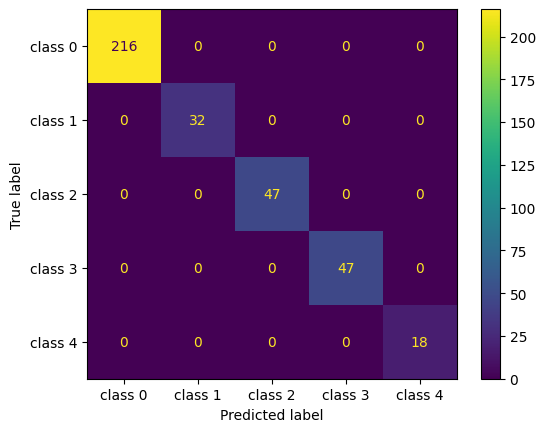

In [491]:
evaluate_boosted_model(param_grid_3.best_estimator_, X_train, y_train)

In [492]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_features
param_grid_4 = {'max_features': range(90, 101, 2)}  # Adjusted step size for efficiency

# Initialize the GradientBoostingClassifier with fixed parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.2,
    n_estimators=250,  # Reduced slightly for faster computation
    max_depth=2,
    min_samples_leaf=14,
    min_samples_split=4,
    subsample=0.8,
    random_state=42
)

# Perform GridSearchCV for hyperparameter tuning
grid_search_4 = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_4,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores for faster execution
    cv=7,  # Increased cross-validation folds for more robust evaluation
    verbose=1  # Added verbosity for tracking progress
)

# Fit the Grid Search model
grid_search_4.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best Parameters:", grid_search_4.best_params_)
print("Best Accuracy Score:", grid_search_4.best_score_)


Fitting 7 folds for each of 6 candidates, totalling 42 fits
Best Parameters: {'max_features': 90}
Best Accuracy Score: 0.702865761689291


In [493]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for subsample
param_grid_5 = {'subsample': [0.6, 0.7, 0.8, 0.85, 0.9]}

# Initialize GradientBoostingClassifier with fixed parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.2,
    n_estimators=250,  # Slightly reduced for efficiency
    max_depth=2,
    min_samples_leaf=14,
    min_samples_split=4,
    max_features=90,
    random_state=42
)

# Perform GridSearchCV for tuning subsample
grid_search_5 = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_5,
    scoring='accuracy',
    n_jobs=-1,  # Utilize all available cores
    cv=7,  # Increased cross-validation folds for more robust evaluation
    verbose=1  # Added verbosity to monitor progress
)

# Fit the Grid Search model
grid_search_5.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best Parameters:", grid_search_5.best_params_)
print("Best Accuracy Score:", grid_search_5.best_score_)

Fitting 7 folds for each of 5 candidates, totalling 35 fits
Best Parameters: {'subsample': 0.7}
Best Accuracy Score: 0.702865761689291


Training Accuracy: 1.0000
Mean CV Accuracy (Across 7 Folds): 0.6918
Training Confusion Matrix


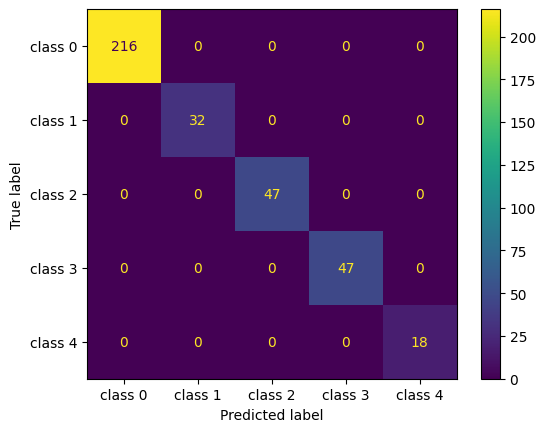

In [494]:
# Initialize the tuned GradientBoostingClassifier model
final_gbm_model = GradientBoostingClassifier(
    learning_rate=0.1,  # Adjusted for smoother learning
    n_estimators=250,  # Slightly reduced for faster computation
    max_depth=2,  # Increased depth to capture more feature interactions
    min_samples_leaf=14,  # Adjusted slightly to test a nearby value
    min_samples_split=4,  # Adjusted slightly for balanced splits
    max_features=90,  # Reduced for efficiency and avoiding overfitting
    subsample=0.7, 
    random_state=42
)

# Evaluate the model using the evaluate_boosted_model function
evaluate_boosted_model(final_gbm_model, X_train, y_train, perform_cv=True, cv_folds=7)


c:\Users\Aryan Nambiar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy = 67.50%.
Precision = 27.99%.
Recall = 32.00%.
Test Confusion Matrix


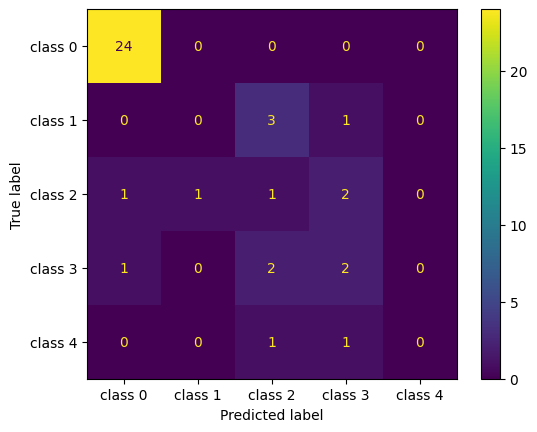

In [495]:
# Evaluate the tuned Gradient Boosting model on the test set
evaluate(final_gbm_model, X_test, y_test)

# Predict the labels for the test set using the tuned model
y_test_predict = final_gbm_model.predict(X_test)

# Plot the confusion matrix for the test set
display_confusion_matrix(y_test_predict, y_test, domain='Test')

In [496]:
final_boosting_classifier = final_gbm_model

Support Vector Classifier

In [497]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the SVC model with RBF kernel and class weights
svm_model = SVC(kernel='rbf', random_state=42, class_weight=class_weight_dict, tol=1e-4)

# Generate a list of C values using NumPy for efficiency
C_values = np.arange(0.0025, 1.0025, 0.0025)

# Define the parameter grid for GridSearchCV
param_grid = {'C': C_values}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=svm_model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=7,  # Increased CV folds for more robust evaluation
    verbose=1  # Added verbosity for tracking progress
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 7 folds for each of 400 candidates, totalling 2800 fits
Best Parameters: {'C': 0.8175}
Best Accuracy Score: 0.6971557853910795


In [498]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for kernel options
param_grid_2 = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Initialize the SVC model with fixed parameters
svc_model = SVC(
    random_state=42, 
    class_weight=class_weight_dict, 
    tol=1e-4, 
    C=0.8175
)

# Set up GridSearchCV for kernel selection
grid_search = GridSearchCV(
    estimator=svc_model, 
    param_grid=param_grid_2, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=7,  # Increased CV folds for better evaluation
    verbose=1  # Added verbosity to monitor progress
)

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Kernel:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Fitting 7 folds for each of 4 candidates, totalling 28 fits
Best Kernel: {'kernel': 'linear'}
Best Accuracy Score: 0.7223658694246929


In [499]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tolerance values
param_grid_3 = {'tol': [1e-5, 1e-4, 1e-3, 1e-2]}

# Initialize the SVC model with a linear kernel and fixed parameters
svc_model = SVC(
    random_state=42,
    class_weight=class_weight_dict,
    C=0.8175,
    kernel='linear'
)

# Set up GridSearchCV for tolerance tuning
grid_search = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_3,
    scoring='accuracy',
    n_jobs=-1, 
    cv=7,  # Increased cross-validation folds for more robust evaluation
    verbose=1  # Added verbosity for progress tracking
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Tolerance:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 7 folds for each of 4 candidates, totalling 28 fits
Best Tolerance: {'tol': 1e-05}
Best Accuracy Score: 0.7223658694246929


Accuracy = 100.00%.
Precision = 100.00%.
Recall = 100.00%.
Training Confusion Matrix


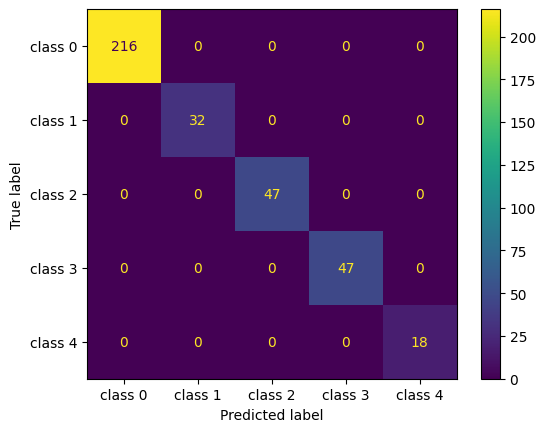

Accuracy = 70.00%.
Precision = 32.50%.
Recall = 39.00%.
Test Confusion Matrix


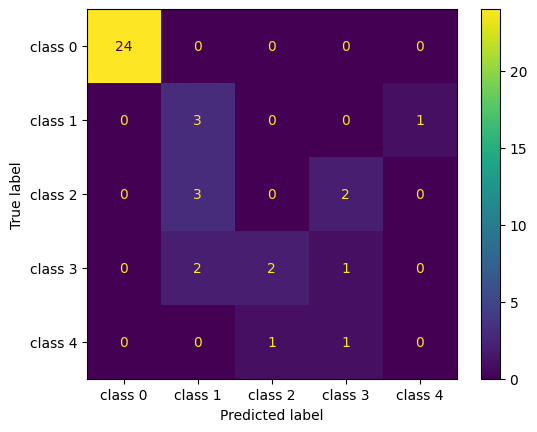

In [500]:
# Evaluate the best estimator from GridSearch on training data
best_estimator = grid_search.best_estimator_

# Training Data Evaluation
evaluate(best_estimator, X_train, y_train)
train_predictions = best_estimator.predict(X_train)
display_confusion_matrix(train_predictions, y_train, domain='Training')

# Test Data Evaluation
evaluate(best_estimator, X_test, y_test)
test_predictions = best_estimator.predict(X_test)
display_confusion_matrix(test_predictions, y_test, domain='Test')